### Importing the relevent libraries

In [1]:
import numpy as np  # Allows us to work with arrays.
import matplotlib.pyplot as plt  # Allows working with plots.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.

import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt # plotting.


from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn.preprocessing import StandardScaler  # Perform the feature scaling.
from sklearn.linear_model import LogisticRegression  # Performs logistic regression.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # creates a confusion matrix
from sklearn.metrics import accuracy_score  # Returns accury score of a model.
from sklearn.neighbors import KNeighborsClassifier  # performs K Neariesst Neighobour.
from sklearn.svm import SVC  # Performs svm
from sklearn.naive_bayes import GaussianNB  # performs naive_bayes gaussianNB.
from sklearn.tree import DecisionTreeClassifier  #Perfroms decision tree classification model.
from sklearn.ensemble import RandomForestClassifier  #Performs random forest classification.
from xgboost import XGBClassifier  # performs xgboost classification. gradiant decision trees.
from sklearn.decomposition import PCA  # Performs model optimization
from sklearn.decomposition import KernelPCA  # Performs model optimization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # performs model optimization
from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.
from sklearn.model_selection import GridSearchCV  # helps select the best hyper parameters

#%matplotlib inline  # helps in showing plots on the browser.

### Importing the dataframe

In [2]:
sucidedataframe = pd.read_csv("suicidedataextrafestures.csv")  # opens csv files and assighns them to a variable.

### Checking the data from the dataframe before pre-processing

In [3]:
sucidedataframe.head(1)  # Taking a look at the dataframe the first elements of the dataset.

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            15110 non-null  object 
 1   year                                                                               15110 non-null  int64  
 2   sex                                                                                15110 non-null  object 
 3   age                                                                                15110 non-null  object 
 4   suicides_no                                                                        15110 non-null  int64  
 5   population                                                                         15110 non-null  int

## 1. Data pre-processing

In [5]:
# Below relevent data is selected that will be used in this project.
sucidedataframe = sucidedataframe[["country", "year",  "age" ,"sex", "population",  \
"Individuals using the Internet (% of population)", "Labor force, total", \
"Mobile cellular subscriptions (per 100 people)", "GDPpyear","GDPpcapital","Expense (% of GDP)",\
"Physicians (per 1,000 people)","Refugee population by country or territory of origin" ,"suicidesper100k"]]## 1. Data pre-processing

In [6]:
sucidedataframe.head(5)

,country,year,age,sex,population,Individuals using the Internet (% of population),"Labor force, total",Mobile cellular subscriptions (per 100 people),GDPpyear,GDPpcapital,Expense (% of GDP),"Physicians (per 1,000 people)",Refugee population by country or territory of origin,suicidesper100k
0,Argentina,1985,75+ years,male,363000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,55.65
1,Argentina,1985,55-74 years,male,1997000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,24.29
2,Argentina,1985,35-54 years,male,3346300,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,12.37
3,Argentina,1985,55-74 years,female,2304000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,9.11
4,Argentina,1985,25-34 years,male,2234200,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,7.92


In [7]:
# Below the col names are renamed.
sucidedataframe = sucidedataframe.set_axis(["Country", "Year", "Age", "Gender", "Population", \
"Internet_Usage_per_%_Population", "Total_Labour_force", "Cellular_subscriptions_per_100_people", \
"GDPpyear","GDPpcapital","Expense_%_of_GDP)",\
"Physicians_per_1,000_people)","Refugee_population_by_country_or_territory_of_origin" ,"Suicidesper100k"],axis=1)

In [8]:
sucidedataframe.columns  # The columns of the dataframe are viewed.

Index(['Country', 'Year', 'Age', 'Gender', 'Population',
       'Internet_Usage_per_%_Population', 'Total_Labour_force',
       'Cellular_subscriptions_per_100_people', 'GDPpyear', 'GDPpcapital',
       'Expense_%_of_GDP)', 'Physicians_per_1,000_people)',
       'Refugee_population_by_country_or_territory_of_origin',
       'Suicidesper100k'],
      dtype='object')

In [9]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(15110, 14)

### Dealing with null values

<AxesSubplot:>

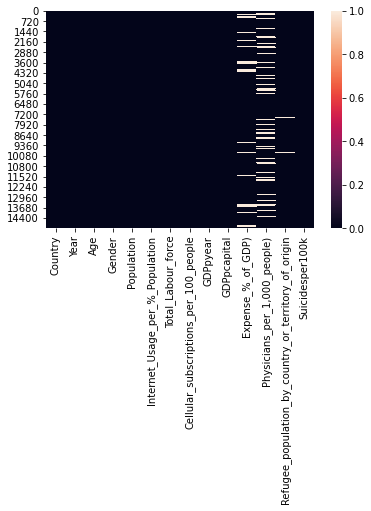

In [10]:
sns.heatmap(sucidedataframe.isnull())

In [11]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Country                                                    0
Year                                                       0
Age                                                        0
Gender                                                     0
Population                                                 0
Internet_Usage_per_%_Population                          108
Total_Labour_force                                         0
Cellular_subscriptions_per_100_people                      0
GDPpyear                                                   0
GDPpcapital                                                0
Expense_%_of_GDP)                                       1476
Physicians_per_1,000_people)                            2328
Refugee_population_by_country_or_territory_of_origin     132
Suicidesper100k                                            0
dtype: int64

In [12]:
sucidedataframe = sucidedataframe.dropna() # droping all rows with at least one null values.

In [13]:
sucidedataframe.reset_index(drop=True, inplace=True)

In [14]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Country                                                 0
Year                                                    0
Age                                                     0
Gender                                                  0
Population                                              0
Internet_Usage_per_%_Population                         0
Total_Labour_force                                      0
Cellular_subscriptions_per_100_people                   0
GDPpyear                                                0
GDPpcapital                                             0
Expense_%_of_GDP)                                       0
Physicians_per_1,000_people)                            0
Refugee_population_by_country_or_territory_of_origin    0
Suicidesper100k                                         0
dtype: int64

In [15]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(11570, 14)

In [16]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11570 entries, 0 to 11569
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               11570 non-null  object 
 1   Year                                                  11570 non-null  int64  
 2   Age                                                   11570 non-null  object 
 3   Gender                                                11570 non-null  object 
 4   Population                                            11570 non-null  int64  
 5   Internet_Usage_per_%_Population                       11570 non-null  float64
 6   Total_Labour_force                                    11570 non-null  int64  
 7   Cellular_subscriptions_per_100_people                 11570 non-null  float64
 8   GDPpyear                                              11

### Dealing with repetetive values

In [17]:
sucidedataframe.nunique()  # 

Country                                                    47
Year                                                       32
Age                                                         6
Gender                                                      2
Population                                              11144
Internet_Usage_per_%_Population                           531
Total_Labour_force                                        538
Cellular_subscriptions_per_100_people                     538
GDPpyear                                                  748
GDPpcapital                                               954
Expense_%_of_GDP)                                         538
Physicians_per_1,000_people)                              415
Refugee_population_by_country_or_territory_of_origin      356
Suicidesper100k                                          3735
dtype: int64

In [18]:
sucidedataframe.duplicated().sum()

0

In [19]:
print(sucidedataframe.pivot_table(columns=['Year'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Year
1985    300
1986    312
1987    360
1988    348
1989    372
1990    468
1991    480
1992    480
1993    456
1994    492
1995    348
1996    360
1997    336
1998    396
1999    372
2000    336
2001    324
2002    336
2003    300
2004    204
2005    168
2006    372
2007    288
2008    300
2009    240
2010    432
2011    432
2012    456
2013    444
2014    504
2015    444
2016    110
dtype: int64


In [20]:
print(sucidedataframe.pivot_table(columns=['Gender'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Gender
female    5785
male      5785
dtype: int64


In [21]:
print(sucidedataframe.pivot_table(columns=['Country'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Country
Argentina             192
Armenia               178
Australia             300
Austria               334
Azerbaijan            120
Belgium               312
Brazil                336
Bulgaria              216
Canada                276
Chile                 264
Colombia              240
Croatia               250
Cuba                   60
Czech Republic        286
Denmark               240
Finland               324
France                192
Georgia               216
Germany               276
Greece                312
Hungary               286
Iceland               358
Ireland               300
Israel                312
Italy                 324
Jamaica                96
Japan                 252
Mexico                288
Mongolia               10
Netherlands           298
New Zealand           228
Norway                336
Poland                252
Portugal              324
Romania               274
Russian Federation    252
South Africa           96
Spain                 372
Swed

In [22]:
sucidedataframe.head(1)

,Country,Year,Age,Gender,Population,Internet_Usage_per_%_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_%_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,Argentina,1985,75+ years,male,363000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,55.65


In [23]:
print(sucidedataframe.pivot_table(columns=['Age'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Age
15-24 years    1932
25-34 years    1932
35-54 years    1932
5-14 years     1910
55-74 years    1932
75+ years      1932
dtype: int64


In [24]:
sucidedataframe.index = pd.RangeIndex(len(sucidedataframe.index))

In [25]:
sucidedataframe.head()

,Country,Year,Age,Gender,Population,Internet_Usage_per_%_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_%_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,Argentina,1985,75+ years,male,363000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,55.65
1,Argentina,1985,55-74 years,male,1997000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,24.29
2,Argentina,1985,35-54 years,male,3346300,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,12.37
3,Argentina,1985,55-74 years,female,2304000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,9.11
4,Argentina,1985,25-34 years,male,2234200,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,7.92


### Encoding variables to  0 and 1

In [26]:
print(sucidedataframe.pivot_table(columns=['Gender'], aggfunc='size'))

Gender
female    5785
male      5785
dtype: int64


In [27]:
print(sucidedataframe.pivot_table(columns=['Age'], aggfunc='size'))

Age
15-24 years    1932
25-34 years    1932
35-54 years    1932
5-14 years     1910
55-74 years    1932
75+ years      1932
dtype: int64


In [28]:
le = LabelEncoder()
sucidedataframe.Gender = pd.get_dummies(sucidedataframe.Gender,drop_first = True)
sucidedataframe.Age= le.fit_transform(sucidedataframe.Age)

In [29]:
print(sucidedataframe.pivot_table(columns=['Gender'], aggfunc='size'))

Gender
0    5785
1    5785
dtype: int64


In [30]:
print(sucidedataframe.pivot_table(columns=['Age'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Age
0    1932
1    1932
2    1932
3    1910
4    1932
5    1932
dtype: int64


In [31]:
sucidedataframe.head()

,Country,Year,Age,Gender,Population,Internet_Usage_per_%_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_%_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,Argentina,1985,5,1,363000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,55.65
1,Argentina,1985,4,1,1997000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,24.29
2,Argentina,1985,2,1,3346300,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,12.37
3,Argentina,1985,4,0,2304000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,9.11
4,Argentina,1985,1,1,2234200,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,7.92


In [32]:
sucidedataframe.describe().round()  # Shows the count, mean, std, min, 25%, 50%, 75% and 
                                    # max of a datframe. 

,Year,Age,Gender,Population,Internet_Usage_per_%_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_%_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
count,11570.0,11570.0,11570.0,11570.0,11570.0,11570.0,11570.0,1.157000e+04,11570.0,11570.0,11570.0,11570.0,11570.0
mean,2000.0,2.0,0.0,3179703.0,22.0,11581759.0,40.0,8.354396e+11,21705.0,18.0,2.0,10804.0,14.0
std,9.0,2.0,1.0,5227735.0,30.0,25834635.0,49.0,2.063111e+12,19448.0,17.0,2.0,49933.0,18.0
min,1985.0,0.0,0.0,4400.0,0.0,0.0,0.0,1.201313e+09,357.0,0.0,0.0,0.0,0.0
25%,1992.0,1.0,0.0,424000.0,0.0,0.0,0.0,6.752364e+10,5466.0,0.0,0.0,0.0,2.0
50%,1999.0,2.0,0.0,1051170.0,2.0,2035576.0,5.0,2.260000e+11,16615.0,17.0,2.0,5.0,8.0
75%,2009.0,4.0,1.0,3677338.0,41.0,8849590.0,88.0,5.890000e+11,31537.0,34.0,3.0,224.0,19.0
max,2016.0,5.0,1.0,43805214.0,97.0,158831064.0,172.0,1.810000e+13,109804.0,60.0,6.0,396717.0,178.0


In [33]:
print("max ", round(178/2))
print("high ", round(89/2))
print("medium ", round(44/2))
print("min ", round(22/2))

max  89
high  44
medium  22
min  11


In [34]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] < 11), "Suicidesper100k"] = 1  # Encoding values above 43 
                                                # as and below 86 to 2.

In [35]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 11) & (sucidedataframe["Suicidesper100k"] < 22), "Suicidesper100k"] = 2  # Encoding values above 43 
                                                # as and below 86 to 2.

In [36]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 22) & (sucidedataframe["Suicidesper100k"] < 44), "Suicidesper100k"] = 3  # Encoding values above 86 
                                                # as and below 172 to 3.

In [37]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 44) & (sucidedataframe["Suicidesper100k"] < 89), "Suicidesper100k"] = 3  # Encoding values above 86 
                                                # as and below 172 to 3.

In [38]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 89) & (sucidedataframe["Suicidesper100k"] <= 178), "Suicidesper100k"] = 4  # Encoding values above 86 
                                                # as and below 172 to 3.

In [39]:
print(sucidedataframe.pivot_table(columns=['Suicidesper100k'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicidesper100k
1.0    7001
2.0    2176
3.0    2281
4.0     112
dtype: int64


In [40]:
sucidedataframe.head()

,Country,Year,Age,Gender,Population,Internet_Usage_per_%_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_%_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,Argentina,1985,5,1,363000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,3.0
1,Argentina,1985,4,1,1997000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,3.0
2,Argentina,1985,2,1,3346300,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,2.0
3,Argentina,1985,4,0,2304000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,1.0
4,Argentina,1985,1,1,2234200,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,1.0


In [41]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11570 entries, 0 to 11569
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               11570 non-null  object 
 1   Year                                                  11570 non-null  int64  
 2   Age                                                   11570 non-null  int32  
 3   Gender                                                11570 non-null  uint8  
 4   Population                                            11570 non-null  int64  
 5   Internet_Usage_per_%_Population                       11570 non-null  float64
 6   Total_Labour_force                                    11570 non-null  int64  
 7   Cellular_subscriptions_per_100_people                 11570 non-null  float64
 8   GDPpyear                                              11

In [42]:
sucidedataframe['Internet_Usage_per_%_Population'] = sucidedataframe['Internet_Usage_per_%_Population'].astype(np.int64)  # converting float to int.

In [43]:
sucidedataframe['Cellular_subscriptions_per_100_people'] = sucidedataframe['Cellular_subscriptions_per_100_people'].astype(np.int64)  # converting float to int.

In [44]:
sucidedataframe['Suicidesper100k'] = sucidedataframe['Suicidesper100k'].astype(np.int64)  # converting float to int.

In [45]:
sucidedataframe['Age'] = sucidedataframe['Age'].astype(np.int64)  # converting float to int.

In [46]:
sucidedataframe['Gender'] = sucidedataframe['Gender'].astype(np.int64)  # converting float to int.

In [47]:
sucidedataframe['GDPpyear'] = sucidedataframe['GDPpyear'].astype(np.int64)  # converting float to int.

In [48]:
sucidedataframe['Expense_%_of_GDP)'] = sucidedataframe['Expense_%_of_GDP)'].astype(np.int64)  # converting float to int.

In [49]:
sucidedataframe['Physicians_per_1,000_people)'] = sucidedataframe['Physicians_per_1,000_people)'].astype(np.int64)  # converting float to int.

In [50]:
sucidedataframe['Refugee_population_by_country_or_territory_of_origin'] = sucidedataframe['Refugee_population_by_country_or_territory_of_origin'].astype(np.int64)  # converting float to int.

In [51]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11570 entries, 0 to 11569
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Country                                               11570 non-null  object
 1   Year                                                  11570 non-null  int64 
 2   Age                                                   11570 non-null  int64 
 3   Gender                                                11570 non-null  int64 
 4   Population                                            11570 non-null  int64 
 5   Internet_Usage_per_%_Population                       11570 non-null  int64 
 6   Total_Labour_force                                    11570 non-null  int64 
 7   Cellular_subscriptions_per_100_people                 11570 non-null  int64 
 8   GDPpyear                                              11570 non-nu

In [ ]:
plt.figure(figsize = (12,9))  # sets the size of the matrix
correlation_matrix = sucidedataframe.corr().round(2)  # creates the correlation matrix
sns.heatmap(data = correlation_matrix, annot = True)  # shows correlation matrix

<AxesSubplot:>

In [ ]:
# Below the col names are renamed.
sucidedataframe = sucidedataframe[["Country", "Age", "Gender", "Population", \
"Internet_Usage_per_%_Population", "Total_Labour_force", "Cellular_subscriptions_per_100_people", \
"GDPpyear","GDPpcapital","Expense_%_of_GDP)",\
"Physicians_per_1,000_people)" ,"Suicidesper100k"]]

In [ ]:
plt.figure(figsize = (12,9))  # sets the size of the matrix
correlation_matrix = sucidedataframe.corr().round(2)  # creates the correlation matrix
sns.heatmap(data = correlation_matrix, annot = True)  # shows correlation matrix

In [ ]:
# COLUMNS TO KEEP
 # Psyscians , expences, gdp per cap, gdp per year, expences % gdp , internet usage per pop, 
 # gender, age

# columns to remove from the above
# column                              -          has high corelation to 
# total labour force                  -          population/internet usage/gdp per cap/gdp per year/expences per gdp/psycians/



In [ ]:
sucidedataframe = sucidedataframe.drop('Total_Labour_force', 1)

In [ ]:
plt.figure(figsize = (12,9))  # sets the size of the matrix
correlation_matrix = sucidedataframe.corr().round(2)  # creates the correlation matrix
sns.heatmap(data = correlation_matrix, annot = True)  # shows correlation matrix

In [ ]:
sucidedataframe = sucidedataframe.drop('GDPpyear', 1)

In [ ]:
plt.figure(figsize = (12,9))  # sets the size of the matrix
correlation_matrix = sucidedataframe.corr().round(2)  # creates the correlation matrix
sns.heatmap(data = correlation_matrix, annot = True)  # shows correlation matrix

In [ ]:
sucidedataframe.columns  # The columns of the dataframe are viewed.

In [ ]:
sucidedataframe = sucidedataframe.drop('Internet_Usage_per_%_Population', 1)
sucidedataframe = sucidedataframe.drop('Cellular_subscriptions_per_100_people', 1)
sucidedataframe = sucidedataframe.drop('Expense_%_of_GDP)', 1)
sucidedataframe = sucidedataframe.drop('Physicians_per_1,000_people)', 1)

In [ ]:
plt.figure(figsize = (12,9))  # sets the size of the matrix
correlation_matrix = sucidedataframe.corr().round(2)  # creates the correlation matrix
sns.heatmap(data = correlation_matrix, annot = True)  # shows correlation matrix

### selecting X and Y values 

In [ ]:
X = sucidedataframe.iloc[:, :-1].values  # selecting the values for the X variable.
X_before_encoding = X

In [ ]:
y = sucidedataframe[["Suicidesper100k"]].to_numpy()  # selecting the values for the Y variable. # done using .to_numpy and not 
                                                       # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                       # horizontal bar which will not alighn with the x values.

In [ ]:
print(X)

In [ ]:
print(y)

### One Hot Encoding

In [ ]:
# count duplicates function learned from: https://datatofish.com/count-duplicates-pandas/
sucidedataframe.pivot_table(columns=['Country'], aggfunc='size')  # counts duplicates in the selected dataframe column.

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')    
# transformers= [('what to do', method , [index of column to apply method on])]
# remainder='what to do with the remaining columns'

X = ct.fit_transform(X).toarray()  # applies the above method on the given array.

In [ ]:
print(X_before_encoding[0])

In [ ]:
print(X[0][49])

In [ ]:
print(X[0])

## Spliting the datasets into a training and test set 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [ ]:
UnScaled_X_train,UnScaled_X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [ ]:
# print the lenghth of both test and train set to see if there equally split.
print("The length of X_train is ",len(X_train), " and the length of y_train is ", len(y_train))  
print("The length of X_test is ",len(X_test), " and the length of y_test is ", len(y_test))

In [ ]:
# print both test and train set to see them.
print("X_test ", X_test, "\ny_test ", y_test, "\nX_train ", X_train, "\ny_train ", y_train)

In [ ]:
# print both test and train set to see them.
print("X_test ", X_test, "\ny_test ", y_test, "\nX_train ", X_train, "\ny_train ", y_train)

In [ ]:
UnScaled_X_train[0][49]

In [ ]:
UnScaled_X_test[0][49]

## Feature Scaling 

In [ ]:
print(X_before_encoding[0])

In [ ]:
print(X[0][49])

In [ ]:
X_train[0][49]  # checking element in the 0th index

In [ ]:
sc = StandardScaler()  # creating an instance of the object.

X_train[:, 49:] = sc.fit_transform(X_train[:, 49:])  # Scaling x_train
X_test[:,49:] = sc.transform(X_test[:, 49:])  # Scaling y_train

In [ ]:
print("X_test ", X_test,"\n\nX_train ", X_train)  # printing the sets after feature scaling.

In [ ]:
X_train[0][49]

In [ ]:
UnScaled_X_train[0][49]

In [ ]:
X_test[0][49]

In [ ]:
UnScaled_X_test[0][49]